In [345]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.cluster import DBSCAN
%matplotlib inline
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import io
from skimage.feature import canny
from cv2 import aruco

In [197]:
import cv2 as cv

In [143]:
def show(img, cmap='gray'):
    """
    function to plot image
    """
    
    plt.figure(figsize=(14,8))
    plt.imshow(img, cmap=cmap)
    #plt.axis('off')
    plt.show()

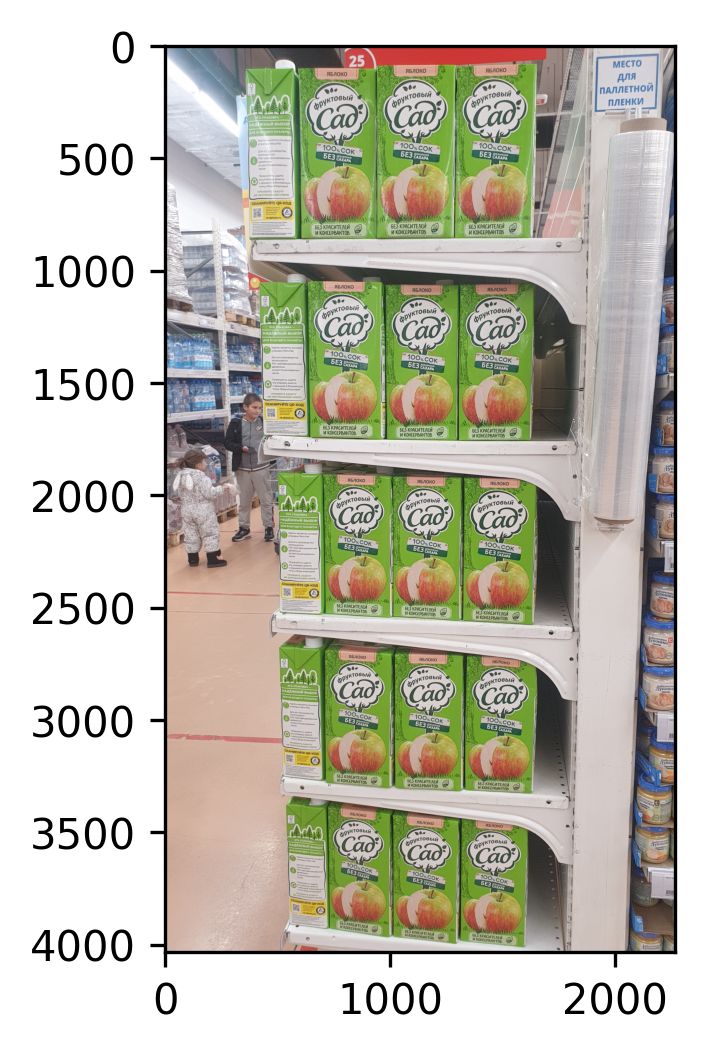

In [261]:
frame = cv2.imread('./train/train_1.jpg')[:,:,::-1]
plt.figure(dpi=300)
plt.imshow(frame)

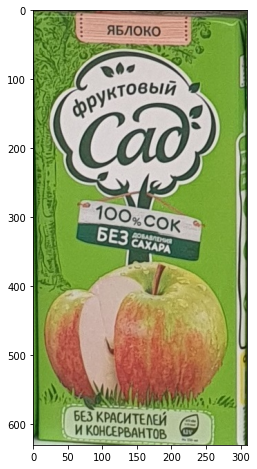

In [262]:

template_orig = cv2.imread('./train/template_1.jpg')[:,:,::-1]
show(template_orig)

In [6]:
template = cv2.cvtColor(template_orig, cv2.COLOR_BGR2GRAY)
orig = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

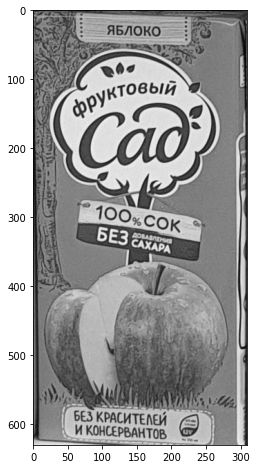

In [7]:
show(template)

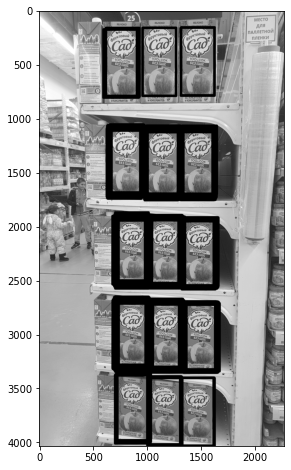

In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

w, h = template.shape[::-1]
res = cv.matchTemplate(orig, template, cv.TM_CCOEFF_NORMED)
threshold = 0.203
loc = np.where( res >= threshold)
img2 = orig.copy()
for pt in zip(*loc[::-1]):
    cv.rectangle(img2, pt, (pt[0] + w, pt[1] + h), (0,0,255), 20)
cv.imwrite('res.png', img2)


show(cv2.imread('./res.png'))

In [9]:
loc

(array([ 150,  150,  151, ..., 3402, 3402, 3402], dtype=int64),
 array([1315, 1316, 1315, ..., 1314, 1315, 1316], dtype=int64))

In [10]:
result = cv2.matchTemplate(orig, template, cv2.TM_CCOEFF_NORMED)
(yCoords, xCoords) = np.where(result >= 0.75)

In [11]:
xCoords

array([ 705,  706,  704,  705,  706,  704,  705,  706,  704,  705,  706,
        704,  705, 1013, 1013], dtype=int64)

In [12]:
list(zip(yCoords, xCoords))

[(1901, 705),
 (1901, 706),
 (1902, 704),
 (1902, 705),
 (1902, 706),
 (1903, 704),
 (1903, 705),
 (1903, 706),
 (1904, 704),
 (1904, 705),
 (1904, 706),
 (1905, 704),
 (1905, 705),
 (1910, 1013),
 (1911, 1013)]

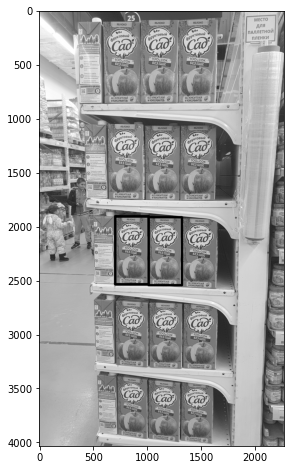

In [13]:
w, h = template.shape[::-1]
img2 = orig.copy()
for pt in list(zip(xCoords, yCoords)):
    cv.rectangle(img2, pt, (pt[0] + w, pt[1] + h), (0,0,255), 20)
cv.imwrite('res.png', img2)
show(cv2.imread('./res.png'))

# Point

In [425]:
query = cv.imread('./train/template_1.jpg',0) # queryImage
img   = cv.imread('./train/train_1.jpg',0)    # trainImage
#import tqdm

def sift_init():
    # Initiate SIFT detector
    sift = cv.SIFT_create()

    #Initiate SURF
    #surf = cv.xfeatures2d.SURF_create(400)

    # find the keypoints and descriptors with SIFT on both images
    # on query
    kp_query, des_query = sift.detectAndCompute(query,None)
    # on train
    kp_img, des_img     = sift.detectAndCompute(img,  None)
    
    flann = cv.FlannBasedMatcher({'algorithm': 1, 'trees': 5}, {'checks' : 50})
    # with knn find 2 closest neighboor
    matches = flann.knnMatch(des_query, des_img, k=2)
    
    # store all the good matches as per Lowe's ratio test.
    # stack DOG and looking for extreme points
    good = []
    for m,n in matches:
        if m.distance < 0.9 * n.distance:
            good.append(m)
    print('good created', len(good))
    return good, kp_query, kp_img

In [426]:
def close(points, h, w):
    """
    checks if this rectangle
    by using np.isclose() we check if arrays are equal
    with 23% tolerance
    """
    print(points)
    if len(points) != 4 or (np.array(points) < 0).sum() > 0:  # not rect
        return False
    
    # for x points we use non-even
    x_array = [points[i] for i in range(1, 5, 2)]
    x_min, x_max = min(x_array), max(x_array)
    
    y_array = [points[j] for j in range(0, 4, 2)]
    y_min, y_max = min(y_array), max(y_array)
    
    print(x_min, x_max, y_min, y_max)
    
    x_norm = abs(x_max - x_min) / h
    y_norm = abs(y_max - y_min) / w
    
    print(x_norm, h, y_norm, w)
    return np.isclose(x_norm, y_norm, 0.08)

good created 2164


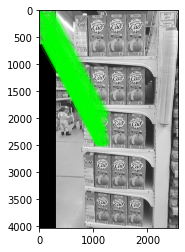

[705.0, 1903.0, 1014.0, 2532.0]


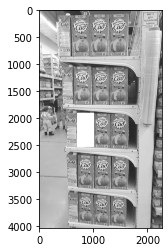

[array([[[ 705, 1902]],

       [[ 704, 2532]],

       [[1014, 2531]],

       [[1014, 1903]]])]
[705.0, 1903.0, 1014.0, 2532.0]
1903.0 2532.0 705.0 1014.0
0.9984126984126984 630 0.9967741935483871 310
[705.0, 1903.0, 1014.0, 2532.0]
1903.0 2532.0 705.0 1014.0
0.9984126984126984 630 0.9967741935483871 310
1467
[1013.0, 1910.0, 1323.0, 2546.0]
1910.0 2546.0 1013.0 1323.0
1.0095238095238095 630 1.0 310
[1013.0, 1910.0, 1323.0, 2546.0]
1910.0 2546.0 1013.0 1323.0
1.0095238095238095 630 1.0 310
1448
[1332.0, 1919.0, 1649.0, 2564.0]
1919.0 2564.0 1332.0 1649.0
1.0238095238095237 630 1.0225806451612902 310
[1332.0, 1919.0, 1649.0, 2564.0]
1919.0 2564.0 1332.0 1649.0
1.0238095238095237 630 1.0225806451612902 310
1442
[634.0, 1040.0, 976.0, 1736.0]
1040.0 1736.0 634.0 976.0
1.1047619047619048 630 1.103225806451613 310
[634.0, 1040.0, 976.0, 1736.0]
1040.0 1736.0 634.0 976.0
1.1047619047619048 630 1.103225806451613 310
1429
[1021.0, 2704.0, 1331.0, 3308.0]
2704.0 3308.0 1021.0 1331.0
0.9587301

In [427]:
MIN_MATCH_COUNT = 20
good, kp_query, kp_img = sift_init()
list_of_bboxes = []
if len(good) > MIN_MATCH_COUNT:
    # extract the locations of matched keypoints in both the images
    src_pts = np.float32([ kp_query[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([   kp_img[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 4.04)
    matchesMask = mask.ravel().tolist()
    #print(matchesMask)
    h,w = query.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    #print(pts)
    
    #find the perspective transformation
    dst = cv.perspectiveTransform(pts,M)
    #green line
    img2 = cv.polylines(img, [np.int32(dst)],True,255,3, cv.LINE_AA)
    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
    img3 = cv.drawMatches(query, kp_query, img ,kp_img, good, None, **draw_params)
    plt.imshow(img3, 'gray'),plt.show()
    img = cv.fillPoly(img, [np.int32(dst)], 255)
    # get coordinates of top left and right bottom
    coord = [dst[0, 0, 0], dst[0, 0, 1], dst[2, 0, 0], dst[2, 0, 1]]
    bbox = [round(v,1) for v in coord]
    print(bbox)
    #coordinates = tuple([dst[0, 0, 0] / img.shape[1], dst[0, 0, 1] / img.shape[0], np.abs(dst[0, 0, 0] - dst[2, 0, 0]) / img.shape[1], np.abs(dst[0, 0, 1] - dst[1, 0, 1]) / img.shape[0]])
    #print(coordinates)
    list_of_bboxes.append(bbox)
    plt.imshow(img, 'gray'),plt.show()
    print([np.int32(dst)])
    
    
    while close(bbox, h, w):
        kp_img, des_img = sift.detectAndCompute(img, None)
        flann = cv.FlannBasedMatcher({'algorithm': 1, 'trees': 5}, {'checks' : 40})
        matches = flann.knnMatch(des_query, des_img, k=2)
        # store all the good matches as per Lowe's ratio test.
        good = []
        for m,n in matches:
            if m.distance < 0.9*n.distance:
                good.append(m)

        if len(good) > MIN_MATCH_COUNT:
            src_pts = np.float32([ kp_query[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
            dst_pts = np.float32([ kp_img[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
            M, mask = cv.findHomography(src_pts, dst_pts, cv2.RANSAC,4.04)
            pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
            dst = cv.perspectiveTransform(pts,M)
            
            if close(bbox, h, w):
                img2 = cv.polylines(img, [np.int32(dst)],True,255,3, cv.LINE_AA)
                #draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                               #singlePointColor = None,
                               #matchesMask = matchesMask, # draw only inliers
                               #flags = 2)
                #img3 = cv.drawMatches(query, kp_query, img ,kp_img, good, None, **draw_params)
                #plt.imshow(img3, 'gray'),plt.show()
                img = cv.fillPoly(img, [np.int32(dst)], 255)
                coord = [dst[0, 0, 0], dst[0, 0, 1], dst[2, 0, 0], dst[2, 0, 1]]
                bbox = [round(v,0) for v in coord]
                list_of_bboxes.append(bbox)
                print(len(good))
    
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None
    print(list_of_bboxes)

print(list_of_bboxes)

In [428]:
len(list_of_bboxes)

16

In [356]:
list_of_bboxes

[[705.0, 1903.0, 1014.0, 2532.0],
 [1013.0, 1910.0, 1323.0, 2546.0],
 [1332.0, 1919.0, 1649.0, 2564.0],
 [634.0, 1041.0, 976.0, 1736.0],
 [1021.0, 2703.0, 1331.0, 3308.0],
 [981.0, 1057.0, 1311.0, 1740.0],
 [711.0, 2685.0, 1010.0, 3296.0],
 [1314.0, 1057.0, 1638.0, 1743.0],
 [1344.0, 2713.0, 1648.0, 3325.0],
 [944.0, 81.0, 1292.0, 835.0],
 [593.0, 92.0, 951.0, 840.0],
 [1298.0, 83.0, 1642.0, 836.0],
 [726.0, 3382.0, 1010.0, 3961.0],
 [1321.0, 3437.0, 1614.0, 4007.0],
 [1017.0, 3423.0, 1308.0, 3993.0],
 [467.0, 701.0, 456.0, 705.0]]

In [364]:
list_of_bboxes

[[705.0, 1903.0, 1014.0, 2532.0],
 [1013.0, 1910.0, 1323.0, 2546.0],
 [1332.0, 1919.0, 1649.0, 2564.0],
 [632.0, 1039.0, 976.0, 1735.0],
 [981.0, 1057.0, 1311.0, 1741.0],
 [1022.0, 2704.0, 1331.0, 3310.0],
 [711.0, 2686.0, 1010.0, 3297.0],
 [1314.0, 1057.0, 1638.0, 1743.0],
 [1344.0, 2713.0, 1647.0, 3323.0],
 [942.0, 86.0, 1295.0, 836.0],
 [593.0, 95.0, 952.0, 840.0],
 [1297.0, 87.0, 1643.0, 837.0],
 [1322.0, 3437.0, 1614.0, 4007.0],
 [725.0, 3382.0, 1010.0, 3961.0],
 [1017.0, 3423.0, 1308.0, 3993.0],
 [136.0, 4081.0, 644.0, 3527.0]]

In [ ]:
[[705, 1902, 1014, 2532], [1013, 1910, 1322, 2545], [1332, 1918, 1648, 2564], [633, 1040, 975, 1735], [1021, 2702, 1330, 3308], [981, 1056, 1310, 1740], [711, 2685, 1011, 3298],
 , [1313, 1057, 1637, 1742], [1344, 2713, 1648, 3327], [943, 82, 1293, 835],[592, 92, 950, 839],[1297, 83, 1641, 836], [725, 3382, 1010, 3960],
  [1321, 3436, 1613, 4007],  [1017, 3422, 1307, 3992]

In [209]:
q = [[705, 1902, 1014, 2532], [1013, 1910, 1322, 2545], [1332, 1918, 1648, 2564], [633, 1040, 975, 1735], [1021, 2702, 1330, 3308], [711, 2685, 1011, 3298], [981, 1056, 1310, 1740], [1313, 1057, 1637, 1742], [1344, 2713, 1648, 3327], [943, 82, 1293, 835], [592, 92, 950, 839], [1297, 83, 1641, 836], [1321, 3436, 1613, 4007], [725, 3382, 1010, 3960],  [1017, 3422, 1307, 3992]]

In [358]:
len(q) == len(list_of_bboxes)

False

In [271]:
len(list_of_bboxes)

16

In [ ]:
frame = cv.imread('./train/train_1.jpg')[:,:,::-1]
template_orig = cv.imread('./train/template_1.jpg')[:,:,::-1]
show(template_orig)

In [200]:
import cv2 as cv
import numpy as np


def sift_init(query, img):
    # Initiate SIFT detector
    sift = cv.SIFT_create()

    # Initiate SURF
    # surf = cv.xfeatures2d.SURF_create(400)

    # find the keypoints and descriptors with SIFT on both images
    # on query
    kp_query, des_query = sift.detectAndCompute(query, None)
    # on train
    kp_img, des_img = sift.detectAndCompute(img, None)

    flann = cv.FlannBasedMatcher({'algorithm': 1, 'trees': 5}, {'checks': 30})
    # with knn find 2 closest neighboor
    matches = flann.knnMatch(des_query, des_img, k=2)

    # store all the good matches as per Lowe's ratio test.
    # stack DOG and looking for extreme points
    good = []
    for m, n in matches:
        if m.distance < 0.9 * n.distance:
            good.append(m)
    #print('good created')
    return good, kp_query, kp_img

#------------------------------------------------------------#
def close(points, h, w):
    """
    checks if our points create a rectangle
    about the size of our query with some tolerance
    """
    #print(points)
    if len(points) != 4:  # not rect
        return False

    # for x points we use non-even
    x_array = [points[i] for i in range(1, 5, 2)]
    x_min, x_max = min(x_array), max(x_array)

    y_array = [points[j] for j in range(0, 4, 2)]
    y_min, y_max = min(y_array), max(y_array)

    #print(x_min, x_max, y_min, y_max)

    x_norm = (x_max - x_min) / h
    y_norm = (y_max - y_min) / w

    #print(x_norm, h, y_norm, w)
    return np.isclose(x_norm, y_norm, 0.25)
#------------------------------------------------------------#


#------------------------------------------------------------#
def find_and_polly(img, query, good, kp_query, kp_img):
    MIN_MATCH_COUNT = 10
    list_of_bboxes = []
    if len(good) > MIN_MATCH_COUNT:
        # extract the locations of matched keypoints in both the images
        src_pts = np.float32([kp_query[m.queryIdx].pt for m in good]).reshape(-1,1,2)
        dst_pts = np.float32([kp_img[m.trainIdx].pt for m in good]).reshape(-1,1,2)
        M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 3.0)
        matchesMask = mask.ravel().tolist()
        #print(matchesMask)
        h,w = query.shape
        pts = np.float32([[0, 0],[0, h-1],[w-1, h-1],[w-1, 0]]).reshape(-1, 1, 2)
        #print(pts)

        #find the perspective transform
        dst = cv.perspectiveTransform(pts,M)
        #green line
        #img2 = cv.polylines(img, [np.int32(dst)],True,255,3, cv.LINE_AA)
        #draw_params = dict(matchColor = (0,255,0), # draw matches in green color
        #               singlePointColor = None,
        #               matchesMask = matchesMask, # draw only inliers
        #               flags = 2)
        #img3 = cv.drawMatches(query, kp_query, img ,kp_img, good, None, **draw_params)
        #plt.imshow(img3, 'gray'),plt.show()
        img = cv.fillPoly(img, [np.int32(dst)], 255)
        # get coordinates of top left and right bottom
        coord = [dst[0, 0, 0], dst[0, 0, 1], dst[2, 0, 0], dst[2, 0, 1]]
        bbox = [round(v,1) for v in coord]
        #print(bbox)
        #coordinates = tuple([dst[0, 0, 0] / img.shape[1], dst[0, 0, 1] / img.shape[0], np.abs(dst[0, 0, 0] - dst[2, 0, 0]) / img.shape[1], np.abs(dst[0, 0, 1] - dst[1, 0, 1]) / img.shape[0]])
        #print(coordinates)
        list_of_bboxes.append(bbox)
        #plt.imshow(img, 'gray'),plt.show()
        #print([np.int32(dst)])


        while close(bbox, h, w):
            kp_img, des_img = sift.detectAndCompute(img, None)
            flann = cv.FlannBasedMatcher({'algorithm': 1, 'trees': 5}, {'checks' : 40})
            matches = flann.knnMatch(des_query, des_img, k=2)
            # store all the good matches as per Lowe's ratio test.
            good = []
            for m,n in matches:
                if m.distance < 0.9*n.distance:
                    good.append(m)

            if len(good) > MIN_MATCH_COUNT:
                src_pts = np.float32([ kp_query[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
                dst_pts = np.float32([ kp_img[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
                M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,3.0)
                pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
                dst = cv.perspectiveTransform(pts,M)

                if close(bbox, h, w):
                    #img2 = cv.polylines(img, [np.int32(dst)],True,255,3, cv.LINE_AA)
                    #draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                                   #singlePointColor = None,
                                   #matchesMask = matchesMask, # draw only inliers
                                   #flags = 2)
                    #img3 = cv.drawMatches(query, kp_query, img ,kp_img, good, None, **draw_params)
                    #plt.imshow(img3, 'gray'),plt.show()
                    img = cv.fillPoly(img, [np.int32(dst)], 255)
                    coord = [dst[0, 0, 0], dst[0, 0, 1], dst[2, 0, 0], dst[2, 0, 1]]
                    bbox = [round(v,0) for v in coord]
                    list_of_bboxes.append(bbox)
                    return list_of_bboxes

    else:
        #print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
        #print(list_of_bboxes)
        return list_of_bboxes
#----------------------------------------------------------------------------#


#------------------------------------------------------------#
def predict_image(img: np.ndarray, query: np.ndarray) -> list:

    # convert to gray
    img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    query = cv.cvtColor(query, cv.COLOR_RGB2GRAY)

    # sift initial
    good, kp_query, kp_img = sift_init(query, img)

    return find_and_polly(img, query, good, kp_query, kp_img)
#------------------------------------------------------------#

https://stackoverflow.com/questions/70357428/sift-match-computer-vision
<br>
https://docs.opencv.org/3.4/d1/de0/tutorial_py_feature_homography.html

index_params{'algorithm': 1, 'trees': 5}
search_params{'checks': 50}
unique{-1: 88, 0: 42, 1: 12, 2: 1899, 3: 28, 4: 23, 5: 5, 10: 8, 6: 7, 11: 5, 7: 5, 8: 16, 9: 10, 14: 5, 12: 7, 16: 2, 13: 5, 17: 5, 15: 5}
mink2
[705, 1902, 704, 2532, 1014, 2532, 1014, 1902]
1902 2532 704 1014


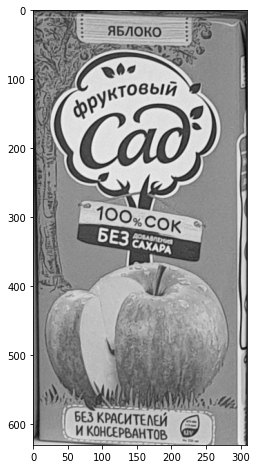

bbox:[705, 1902, 1014, 2532]
unique{0: 353, -1: 80, 1: 317, 13: 10, 2: 598, 4: 21, 3: 8, 5: 6, 6: 7, 7: 6, 9: 15, 8: 5, 10: 16, 14: 8, 11: 9, 12: 8, 15: 7}
mink2
[1013, 1910, 1006, 2544, 1322, 2545, 1327, 1907]
1907 2545 1006 1327


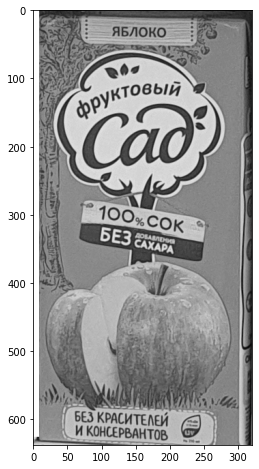

bbox:[1013, 1910, 1322, 2545]


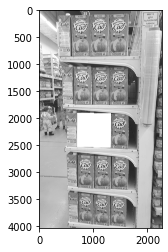

[[705, 1902, 1014, 2532]]
unique{0: 455, 1: 419, -1: 52, 2: 307, 4: 22, 3: 8, 5: 11, 6: 41, 8: 27, 7: 10, 9: 7, 10: 12, 11: 14, 12: 16, 13: 10, 14: 8, 15: 5, 16: 5}
mink0
[1021, 2702, 1018, 3309, 1330, 3308, 1335, 2700]
2700 3309 1018 1335


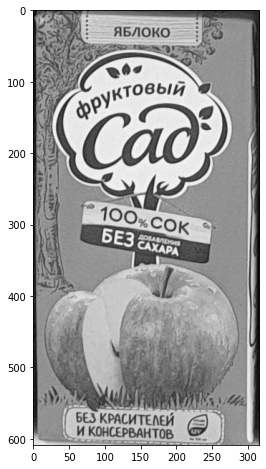

bbox:[1021, 2702, 1330, 3308]


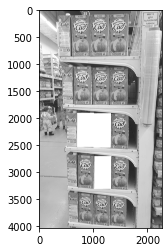

[[705, 1902, 1014, 2532], [1013, 1910, 1322, 2545]]
unique{0: 195, 1: 456, -1: 57, 11: 9, 2: 332, 3: 37, 4: 16, 5: 107, 6: 146, 7: 15, 8: 10, 12: 10, 9: 14, 14: 4, 10: 7, 13: 5}
mink1
[633, 1040, 638, 1746, 975, 1735, 975, 1035]
1035 1746 633 975


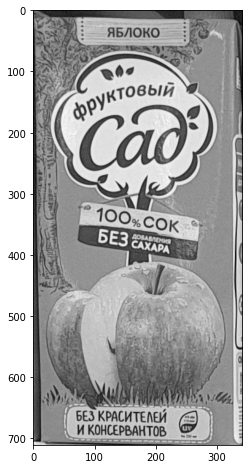

bbox:[633, 1040, 975, 1735]


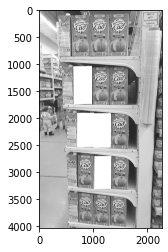

[[705, 1902, 1014, 2532], [1013, 1910, 1322, 2545], [1021, 2702, 1330, 3308]]
unique{0: 227, -1: 65, 1: 69, 2: 47, 3: 329, 7: 17, 4: 390, 5: 73, 6: 159, 9: 18, 8: 12, 10: 11, 11: 9, 12: 4}
mink4
[1332, 1918, 1318, 2563, 1648, 2564, 1660, 1914]
1914 2564 1318 1660


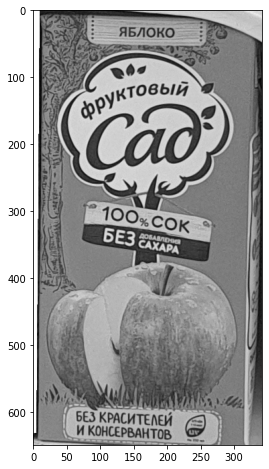

bbox:[1332, 1918, 1648, 2564]


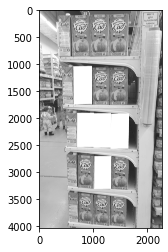

[[705, 1902, 1014, 2532], [1013, 1910, 1322, 2545], [1021, 2702, 1330, 3308], [633, 1040, 975, 1735]]
unique{0: 294, -1: 51, 1: 136, 2: 218, 3: 473, 4: 214, 5: 12, 7: 8, 6: 20, 8: 4}
mink3
[981, 1056, 980, 1756, 1310, 1740, 1318, 1049]
1049 1756 980 1318


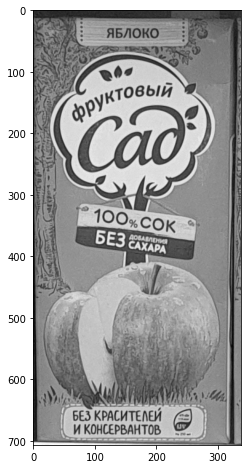

bbox:[981, 1056, 1310, 1740]


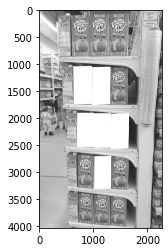

[[705, 1902, 1014, 2532], [1013, 1910, 1322, 2545], [1021, 2702, 1330, 3308], [633, 1040, 975, 1735], [1332, 1918, 1648, 2564]]
unique{0: 338, 6: 5, -1: 55, 1: 303, 2: 165, 3: 242, 4: 282, 5: 13}
mink0
[711, 2685, 707, 3284, 1011, 3298, 1019, 2690]
2685 3298 707 1019


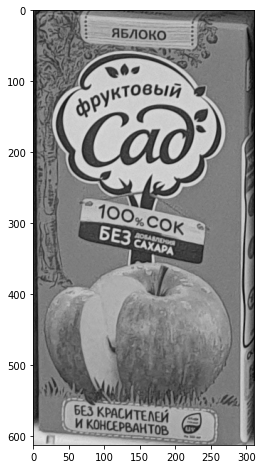

bbox:[711, 2685, 1011, 3298]


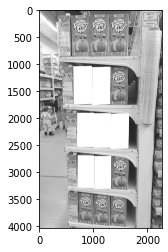

[[705, 1902, 1014, 2532], [1013, 1910, 1322, 2545], [1021, 2702, 1330, 3308], [633, 1040, 975, 1735], [1332, 1918, 1648, 2564], [981, 1056, 1310, 1740]]
unique{-1: 57, 0: 412, 1: 7, 2: 231, 3: 345, 4: 340}
mink0
[592, 92, 599, 859, 950, 839, 952, 88]
88 859 592 952


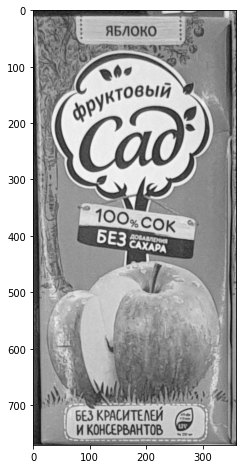

bbox:[592, 92, 950, 839]


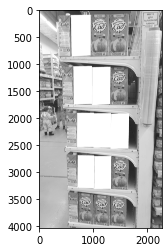

[[705, 1902, 1014, 2532], [1013, 1910, 1322, 2545], [1021, 2702, 1330, 3308], [633, 1040, 975, 1735], [1332, 1918, 1648, 2564], [981, 1056, 1310, 1740], [711, 2685, 1011, 3298]]
unique{0: 331, -1: 83, 1: 256, 2: 378, 3: 387}
mink3
[1313, 1057, 1299, 1762, 1637, 1742, 1656, 1042]
1042 1762 1299 1656


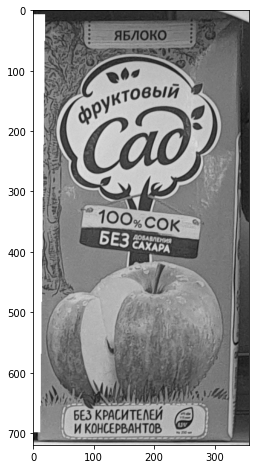

bbox:[1313, 1057, 1637, 1742]


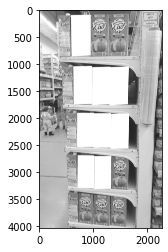

[[705, 1902, 1014, 2532], [1013, 1910, 1322, 2545], [1021, 2702, 1330, 3308], [633, 1040, 975, 1735], [1332, 1918, 1648, 2564], [981, 1056, 1310, 1740], [711, 2685, 1011, 3298], [592, 92, 950, 839]]
unique{-1: 86, 0: 512, 1: 5, 2: 315, 3: 482, 4: 5}
mink0
[943, 82, 936, 857, 1293, 835, 1306, 67]
67 857 936 1306


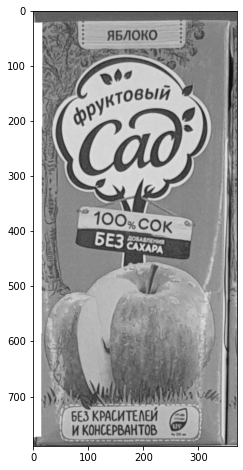

bbox:[943, 82, 1293, 835]


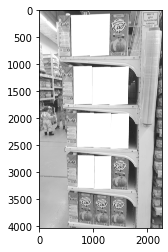

[[705, 1902, 1014, 2532], [1013, 1910, 1322, 2545], [1021, 2702, 1330, 3308], [633, 1040, 975, 1735], [1332, 1918, 1648, 2564], [981, 1056, 1310, 1740], [711, 2685, 1011, 3298], [592, 92, 950, 839], [1313, 1057, 1637, 1742]]
unique{-1: 89, 0: 5, 1: 558, 2: 371, 3: 6, 4: 354, 5: 31, 7: 5, 8: 5, 6: 6}
mink1
[1344, 2713, 1330, 3325, 1648, 3327, 1660, 2712]
2712 3327 1330 1660


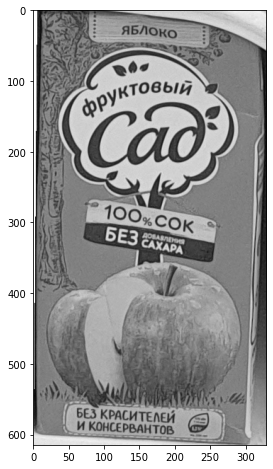

bbox:[1344, 2713, 1648, 3327]


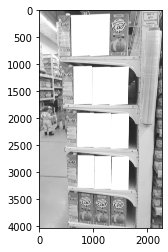

[[705, 1902, 1014, 2532], [1013, 1910, 1322, 2545], [1021, 2702, 1330, 3308], [633, 1040, 975, 1735], [1332, 1918, 1648, 2564], [981, 1056, 1310, 1740], [711, 2685, 1011, 3298], [592, 92, 950, 839], [1313, 1057, 1637, 1742], [943, 82, 1293, 835]]
unique{-1: 98, 0: 9, 1: 646, 3: 9, 2: 505, 4: 5}
mink1
[725, 3382, 722, 3934, 1010, 3960, 1008, 3407]
3382 3960 722 1010


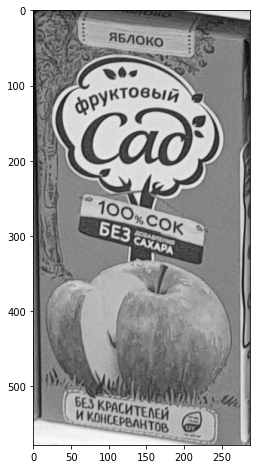

bbox:[725, 3382, 1010, 3960]


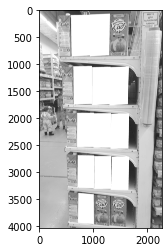

[[705, 1902, 1014, 2532], [1013, 1910, 1322, 2545], [1021, 2702, 1330, 3308], [633, 1040, 975, 1735], [1332, 1918, 1648, 2564], [981, 1056, 1310, 1740], [711, 2685, 1011, 3298], [592, 92, 950, 839], [1313, 1057, 1637, 1742], [943, 82, 1293, 835], [1344, 2713, 1648, 3327]]
unique{-1: 130, 0: 14, 1: 544, 2: 582, 3: 8}
mink2
[1297, 83, 1281, 859, 1641, 836, 1666, 59]
59 859 1281 1666


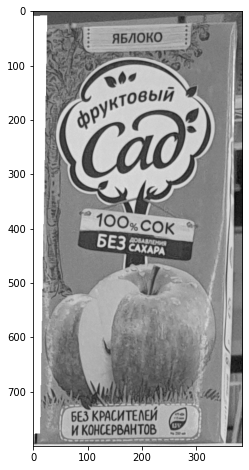

bbox:[1297, 83, 1641, 836]


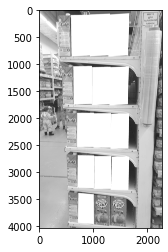

[[705, 1902, 1014, 2532], [1013, 1910, 1322, 2545], [1021, 2702, 1330, 3308], [633, 1040, 975, 1735], [1332, 1918, 1648, 2564], [981, 1056, 1310, 1740], [711, 2685, 1011, 3298], [592, 92, 950, 839], [1313, 1057, 1637, 1742], [943, 82, 1293, 835], [1344, 2713, 1648, 3327], [725, 3382, 1010, 3960]]
unique{-1: 128, 0: 889, 1: 17, 6: 9, 4: 8, 2: 11, 3: 8, 9: 5, 8: 5, 5: 10, 7: 10}
mink0
[1321, 3436, 1307, 3990, 1613, 4007, 1623, 3449]
3436 4007 1307 1623


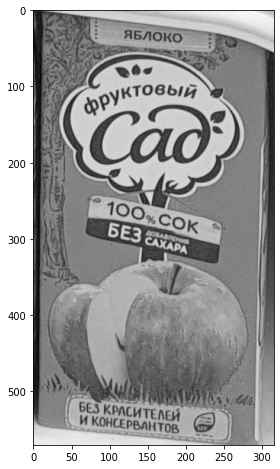

bbox:[1321, 3436, 1613, 4007]


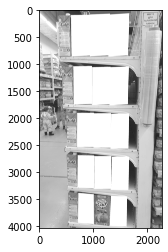

[[705, 1902, 1014, 2532], [1013, 1910, 1322, 2545], [1021, 2702, 1330, 3308], [633, 1040, 975, 1735], [1332, 1918, 1648, 2564], [981, 1056, 1310, 1740], [711, 2685, 1011, 3298], [592, 92, 950, 839], [1313, 1057, 1637, 1742], [943, 82, 1293, 835], [1344, 2713, 1648, 3327], [725, 3382, 1010, 3960], [1297, 83, 1641, 836]]
unique{0: 11, -1: 138, 1: 27, 12: 5, 2: 738, 6: 16, 3: 13, 4: 16, 5: 6, 7: 12, 8: 7, 9: 22, 11: 7, 10: 5}
mink2
[1017, 3422, 1009, 3972, 1307, 3992, 1314, 3439]
3422 3992 1009 1314


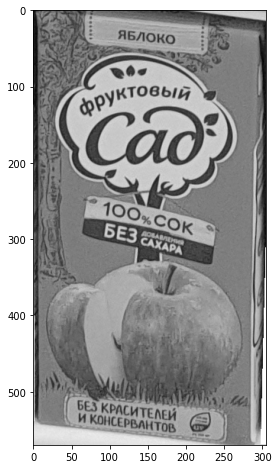

bbox:[1017, 3422, 1307, 3992]


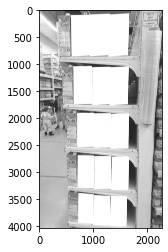

[[705, 1902, 1014, 2532], [1013, 1910, 1322, 2545], [1021, 2702, 1330, 3308], [633, 1040, 975, 1735], [1332, 1918, 1648, 2564], [981, 1056, 1310, 1740], [711, 2685, 1011, 3298], [592, 92, 950, 839], [1313, 1057, 1637, 1742], [943, 82, 1293, 835], [1344, 2713, 1648, 3327], [725, 3382, 1010, 3960], [1297, 83, 1641, 836], [1321, 3436, 1613, 4007]]
unique{0: 7, 1: 39, -1: 117, 2: 20, 3: 15, 5: 41, 11: 12, 4: 22, 6: 55, 7: 5, 8: 13, 9: 5, 10: 9, 12: 19, 13: 13, 15: 31, 14: 23, 18: 5, 16: 12, 17: 6}
mink-1
[3572, -512, 2232, 2079, 2275, 1112, 1887, 2108]
-512 2108 1887 3572


C:\Users\Nikolay\AppData\Local\Temp\ipykernel_2308\3430502440.py:7: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(img, cmap=cmap)


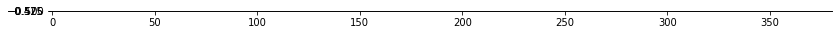

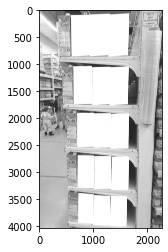

[[705, 1902, 1014, 2532], [1013, 1910, 1322, 2545], [1021, 2702, 1330, 3308], [633, 1040, 975, 1735], [1332, 1918, 1648, 2564], [981, 1056, 1310, 1740], [711, 2685, 1011, 3298], [592, 92, 950, 839], [1313, 1057, 1637, 1742], [943, 82, 1293, 835], [1344, 2713, 1648, 3327], [725, 3382, 1010, 3960], [1297, 83, 1641, 836], [1321, 3436, 1613, 4007], [1017, 3422, 1307, 3992]]


In [107]:
img2 = frame.copy()
template = template_orig.copy()

MIN_MATCH_COUNT = 10

# initializing image and query
img  = cv.cvtColor(img2, cv.COLOR_RGB2GRAY) 
query  = cv.cvtColor(template, cv.COLOR_RGB2GRAY)

# creating a SIFT detector
sift = cv.SIFT_create()

# finding keypoints and descriptors on query
kp_q, des_q = sift.detectAndCompute(query, None)

# index_params & search_params
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
print(f"index_params{index_params}")
print(f"search_params{search_params}")
#flann matcher
flann = cv.FlannBasedMatcher(index_params, search_params)

#------------------------------------------------------------#
def close(img, points, h, w):
    """
    checks if this rectangle
    by using np.isclose() we check if arrays are equal
    with 23% tolerance
    """
    print(points)
    x_array = [points[i] for i in range(1, 8, 2)]
    x_min, x_max = min(x_array), max(x_array)

    y_array = [points[j] for j in range(0, 7, 2)]
    y_min, y_max = min(y_array), max(y_array)
    print(x_min, x_max, y_min, y_max)
    
    
    img2 = img[x_min:x_max, y_min:y_max]
    show(img2)
    h_img2, w_img2 = img2.shape
    #print(h_img2, h, w_img2, w)
    return np.isclose(h_img2 / h, w_img2 / w, 0.23)

#------------------------------------------------------------#
def find_and_polly(img, kp_q, des_q, query_shape, sift, flann):
    """
    this function takes an image and query then uses sift to find kepyoints
    on img and query, then uses fillPoly to delete already found area
    and gives coordinates of cropped area
    can be done reccursively with abusing of res (boolType)
    """
    # finding keypoints and descriptors on img
    kp2, des2 = sift.detectAndCompute(img, None)

    # finding matches with knn on img with desc on query    
    matches = flann.knnMatch(des_q, des2, k=2)

    # store all the good matches as per Lowe's ratio test
    good = []
    for i, (m,n) in enumerate(matches):
        if m.distance < 0.9 * n.distance:
            good.append(m)         

    # list of distances
    dst_pt = [ kp2[m.trainIdx].pt for m in good ]
    #print(dst_pt)
    
    # labels via DBSCAN fitted on distances
    labels = DBSCAN(eps=100).fit_predict(dst_pt)
    #print(np.unique(labels))

    # let's create a dict with unique labels
    uniq = {}   
    for pos, a in enumerate(labels):
        if not (a in uniq):
            uniq[a] = 1
        else:
            uniq[a] +=1
    print(f"unique{uniq}")
    # max element
    mink = max(uniq, key=uniq.get)
    print(f"mink{mink}")
    #creating array of DMatch 
    ready = []
    for n, x in enumerate(labels): 
        if x == mink:
            ready.append(good[n])  


    # check if less then our min_match we retern just img, 
    # else we get location of matched keypoints 
    # in both images, use transformation matrix to transform the corners of query to corresponding
    # points in img
    if len(ready) > MIN_MATCH_COUNT:
        src_pts = np.float32([ kp_q[m.queryIdx].pt for m in ready ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in ready ]).reshape(-1,1,2)

        M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
        matchesMask = mask.ravel().tolist() 
        h,w = query.shape[0], query.shape[1]
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv.perspectiveTransform(pts,M)
        pts_transformed = np.int32(dst).reshape(8).tolist()
        if (not close(img,pts_transformed, h, w)):
            return [False, img, [-1, -1, -1, -1]]

        img2 = cv.fillPoly(img, [np.int32(dst)], 255) # fillPoly to fill the already found area

        bbox = pts_transformed[:2] + pts_transformed[4:6]
        print(f"bbox:{bbox}")
        draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                       singlePointColor = None,
                       matchesMask = matchesMask, # draw only inliers
                       flags = 2)
        img3 = cv.drawMatches(img, kp_q, img2, kp2, ready, None, **draw_params)    

        return [True, img2, bbox]
    else:
        return [False, img, [-1, -1, -1, -1]]
#----------------------------------------------------------------------------#

    
res, new_img, bbox = find_and_polly(img, kp_q, des_q, query.shape, sift, flann)
list_of_bboxes = [ ]
while (res):
    list_of_bboxes.append(bbox)
    res, new_img, bbox = find_and_polly(new_img, kp_q, des_q, query.shape, sift, flann)

    plt.imshow(new_img, 'gray'),plt.show()
    print(list_of_bboxes)
#list_of_bboxes

In [ ]:
frame = cv2.imread('./train/train_2.jpg')[:,:,::-1]
template_orig = cv2.imread('./train/template_2.jpg')[:,:,::-1]

img2 = frame.copy()
template = template_orig.copy()

MIN_MATCH_COUNT = 10

# initializing image and query
img  = cv.cvtColor(img2, cv.COLOR_RGB2GRAY) 
query  = cv.cvtColor(template, cv.COLOR_RGB2GRAY)

# creating a SIFT detector
sift = cv.SIFT_create()

# finding keypoints and descriptors on query
kp_q, des_q = sift.detectAndCompute(query, None)

# index_params & search_params
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

#flann matcher
flann = cv.FlannBasedMatcher(index_params, search_params)

#------------------------------------------------------------#
def close(img, points, h, w):
    """
    checks if this rectangle
    by using np.isclose() we check if arrays are equal
    with 23% tolerance
    """
    print(points)
    x_array = [points[i] for i in range(1, 8, 2)]
    x_min, x_max = min(x_array), max(x_array)

    y_array = [points[j] for j in range(0, 7, 2)]
    y_min, y_max = min(y_array), max(y_array)

    img2 = img[x_min:x_max, y_min:y_max]
    h_img2, w_img2 = img2.shape
    print(h_img2, h, w_img2, w)
    return np.isclose(h_img2 / h, w_img2 / w, 0.23)

#------------------------------------------------------------#
def find_and_polly(img, kp_q, des_q, query_shape, sift, flann):
    """
    this function takes an image and query then uses sift to find kepyoints
    on img and query, then uses fillPoly to delete already found area
    and gives coordinates of cropped area
    can be done reccursively with abusing of res (boolType)
    """
    # finding keypoints and descriptors on img
    kp2, des2 = sift.detectAndCompute(img, None)

    # finding matches with knn on img with desc on query    
    matches = flann.knnMatch(des_q, des2, k=2)

    # store all the good matches as per Lowe's ratio test
    good = []
    for i, (m,n) in enumerate(matches):
        if m.distance < 0.9 * n.distance:
            good.append(m)         

    # list of distances
    dst_pt = [ kp2[m.trainIdx].pt for m in good ]

    # labels via DBSCAN fitted on distances
    labels = DBSCAN(eps=100).fit_predict(dst_pt)
    #print(np.unique(labels))

    # let's create a dict with unique labels
    uniq = {}   
    for pos, a in enumerate(labels):
        if not (a in uniq):
            uniq[a] = 1
        else:
            uniq[a] +=1

    # max element
    mink = max(uniq, key=uniq.get)

    #creating array of DMatch 
    ready = []
    for n, x in enumerate(labels): 
        if x == mink:
            ready.append(good[n])  

    # check if less then our min_match we retern just img, 
    # else we get location of matched keypoints 
    # in both images, use transformation matrix to transform the corners of query to corresponding
    # points in img
    if len(ready) > MIN_MATCH_COUNT:
        src_pts = np.float32([ kp_q[m.queryIdx].pt for m in ready ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in ready ]).reshape(-1,1,2)
        M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
        matchesMask = mask.ravel().tolist() 
        h,w = query.shape[0], query.shape[1]
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv.perspectiveTransform(pts,M)
        pts_transformed = np.int32(dst).reshape(8).tolist()
        close(img,pts_transformed, h, w)

        if (not close(img,pts_transformed, h, w)):
            return [False, img, [-1, -1, -1, -1]]

        img2 = cv.fillPoly(img, [np.int32(dst)], 255) # fillPoly to fill the already found area

        bbox = pts_transformed[:2] + pts_transformed[4:6]
        draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                       singlePointColor = None,
                       matchesMask = matchesMask, # draw only inliers
                       flags = 2)
        img3 = cv.drawMatches(img, kp_q, img2, kp2, ready, None, **draw_params)    

        return [True, img2, bbox]
    else:
        return [False, img, [-1, -1, -1, -1]]
#----------------------------------------------------------------------------#

    
res, new_img, bbox = find_and_polly(img, kp_q, des_q, query.shape, sift, flann)
list_of_bboxes = [ ]
while (res):
    list_of_bboxes.append(bbox)
    res, new_img, bbox = find_and_polly(new_img, kp_q, des_q, query.shape, sift, flann)

    plt.imshow(new_img, 'gray'),plt.show()
    print(list_of_bboxes)
list_of_bboxes

In [ ]:
frame = cv2.imread('./train/train_3.jpg')[:,:,::-1]
template_orig = cv2.imread('./train/template_3.jpg')[:,:,::-1]

img2 = frame.copy()
template = template_orig.copy()

MIN_MATCH_COUNT = 10

# initializing image and query
img  = cv.cvtColor(img2, cv.COLOR_RGB2GRAY) 
query  = cv.cvtColor(template, cv.COLOR_RGB2GRAY)

# creating a SIFT detector
sift = cv.SIFT_create()

# finding keypoints and descriptors on query
kp_q, des_q = sift.detectAndCompute(query, None)

# index_params & search_params
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

#flann matcher
flann = cv.FlannBasedMatcher(index_params, search_params)

#------------------------------------------------------------#
def close(img, points, h, w):
    """
    checks if this rectangle
    by using np.isclose() we check if arrays are equal
    with 23% tolerance
    """
    print(points)
    x_array = [points[i] for i in range(1, 8, 2)]
    x_min, x_max = min(x_array), max(x_array)

    y_array = [points[j] for j in range(0, 7, 2)]
    y_min, y_max = min(y_array), max(y_array)

    img2 = img[x_min:x_max, y_min:y_max]
    h_img2, w_img2 = img2.shape
    print(h_img2, h, w_img2, w)
    return np.isclose(h_img2 / h, w_img2 / w, 0.2)

#------------------------------------------------------------#
def find_and_polly(img, kp_q, des_q, query_shape, sift, flann):
    """
    this function takes an image and query then uses sift to find kepyoints
    on img and query, then uses fillPoly to delete already found area
    and gives coordinates of cropped area
    can be done reccursively with abusing of res (boolType)
    """
    # finding keypoints and descriptors on img
    kp2, des2 = sift.detectAndCompute(img, None)

    # finding matches with knn on img with desc on query    
    matches = flann.knnMatch(des_q, des2, k=2)

    # store all the good matches as per Lowe's ratio test
    good = []
    for i, (m,n) in enumerate(matches):
        if m.distance < 0.9 * n.distance:
            good.append(m)         

    # list of distances
    dst_pt = [ kp2[m.trainIdx].pt for m in good ]

    # labels via DBSCAN fitted on distances
    labels = DBSCAN(eps=100).fit_predict(dst_pt)
    #print(np.unique(labels))

    # let's create a dict with unique labels
    uniq = {}   
    for pos, a in enumerate(labels):
        if not (a in uniq):
            uniq[a] = 1
        else:
            uniq[a] +=1

    # max element
    mink = max(uniq, key=uniq.get)

    #creating array of DMatch 
    ready = []
    for n, x in enumerate(labels): 
        if x == mink:
            ready.append(good[n])  

    # check if less then our min_match we retern just img, 
    # else we get location of matched keypoints 
    # in both images, use transformation matrix to transform the corners of query to corresponding
    # points in img
    if len(ready) > MIN_MATCH_COUNT:
        src_pts = np.float32([ kp_q[m.queryIdx].pt for m in ready ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in ready ]).reshape(-1,1,2)
        M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
        matchesMask = mask.ravel().tolist() 
        h,w = query.shape[0], query.shape[1]
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv.perspectiveTransform(pts,M)
        pts_transformed = np.int32(dst).reshape(8).tolist()
        close(img,pts_transformed, h, w)

        if (not close(img,pts_transformed, h, w)):
            return [False, img, [-1, -1, -1, -1]]

        img2 = cv.fillPoly(img, [np.int32(dst)], 255) # fillPoly to fill the already found area

        bbox = pts_transformed[:2] + pts_transformed[4:6]
        draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                       singlePointColor = None,
                       matchesMask = matchesMask, # draw only inliers
                       flags = 2)
        img3 = cv.drawMatches(img, kp_q, img2, kp2, ready, None, **draw_params)    

        return [True, img2, bbox]
    else:
        return [False, img, [-1, -1, -1, -1]]
#----------------------------------------------------------------------------#

    
res, new_img, bbox = find_and_polly(img, kp_q, des_q, query.shape, sift, flann)
list_of_bboxes = [ ]
while (res):
    list_of_bboxes.append(bbox)
    res, new_img, bbox = find_and_polly(new_img, kp_q, des_q, query.shape, sift, flann)

    plt.imshow(new_img, 'gray'),plt.show()
    print(list_of_bboxes)
list_of_bboxes

In [ ]:
frame = cv2.imread('./train/train_0.jpg')[:,:,::-1]
template_orig = cv2.imread('./train/template_0_0.jpg')[:,:,::-1]

img2 = frame.copy()
template = template_orig.copy()

MIN_MATCH_COUNT = 10

# initializing image and query
img  = cv.cvtColor(img2, cv.COLOR_RGB2GRAY) 
query  = cv.cvtColor(template, cv.COLOR_RGB2GRAY)

# creating a SIFT detector
sift = cv.SIFT_create()

# finding keypoints and descriptors on query
kp_q, des_q = sift.detectAndCompute(query, None)

# index_params & search_params
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

#flann matcher
flann = cv.FlannBasedMatcher(index_params, search_params)

#------------------------------------------------------------#
def close(img, points, h, w):
    """
    checks if this rectangle
    by using np.isclose() we check if arrays are equal
    with 23% tolerance
    """
    print(points)
    x_array = [points[i] for i in range(1, 8, 2)]
    x_min, x_max = min(x_array), max(x_array)

    y_array = [points[j] for j in range(0, 7, 2)]
    y_min, y_max = min(y_array), max(y_array)

    img2 = img[x_min:x_max, y_min:y_max]
    h_img2, w_img2 = img2.shape
    print(h_img2, h, w_img2, w)
    return np.isclose(h_img2 / h, w_img2 / w, 0.23)

#------------------------------------------------------------#
def find_and_polly(img, kp_q, des_q, query_shape, sift, flann):
    """
    this function takes an image and query then uses sift to find kepyoints
    on img and query, then uses fillPoly to delete already found area
    and gives coordinates of cropped area
    can be done reccursively with abusing of res (boolType)
    """
    # finding keypoints and descriptors on img
    kp2, des2 = sift.detectAndCompute(img, None)

    # finding matches with knn on img with desc on query    
    matches = flann.knnMatch(des_q, des2, k=2)

    # store all the good matches as per Lowe's ratio test
    good = []
    for i, (m,n) in enumerate(matches):
        if m.distance < 0.9 * n.distance:
            good.append(m)         

    # list of distances
    dst_pt = [ kp2[m.trainIdx].pt for m in good ]

    # labels via DBSCAN fitted on distances
    labels = DBSCAN(eps=100).fit_predict(dst_pt)
    #print(np.unique(labels))

    # let's create a dict with unique labels
    uniq = {}   
    for pos, a in enumerate(labels):
        if not (a in uniq):
            uniq[a] = 1
        else:
            uniq[a] +=1

    # max element
    mink = max(uniq, key=uniq.get)

    #creating array of DMatch 
    ready = []
    for n, x in enumerate(labels): 
        if x == mink:
            ready.append(good[n])  

    # check if less then our min_match we retern just img, 
    # else we get location of matched keypoints 
    # in both images, use transformation matrix to transform the corners of query to corresponding
    # points in img
    if len(ready) > MIN_MATCH_COUNT:
        src_pts = np.float32([ kp_q[m.queryIdx].pt for m in ready ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in ready ]).reshape(-1,1,2)
        M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
        matchesMask = mask.ravel().tolist() 
        h,w = query.shape[0], query.shape[1]
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv.perspectiveTransform(pts,M)
        pts_transformed = np.int32(dst).reshape(8).tolist()
        close(img,pts_transformed, h, w)

        if (not close(img,pts_transformed, h, w)):
            return [False, img, [-1, -1, -1, -1]]

        img2 = cv.fillPoly(img, [np.int32(dst)], 255) # fillPoly to fill the already found area

        bbox = pts_transformed[:2] + pts_transformed[4:6]
        draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                       singlePointColor = None,
                       matchesMask = matchesMask, # draw only inliers
                       flags = 2)
        img3 = cv.drawMatches(img, kp_q, img2, kp2, ready, None, **draw_params)    

        return [True, img2, bbox]
    else:
        return [False, img, [-1, -1, -1, -1]]
#----------------------------------------------------------------------------#

    
res, new_img, bbox = find_and_polly(img, kp_q, des_q, query.shape, sift, flann)
list_of_bboxes = [ ]
while (res):
    list_of_bboxes.append(bbox)
    res, new_img, bbox = find_and_polly(new_img, kp_q, des_q, query.shape, sift, flann)

    plt.imshow(new_img, 'gray'),plt.show()
    print(list_of_bboxes)
list_of_bboxes

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth, DBSCAN

def get_points(kp):
    res = np.array([kp[0].pt])
    for i in range(1, len(kp)):
        res = np.append(res, [kp[i].pt], axis=0)

    return res

def clasterize(points):
    bandwidth = estimate_bandwidth(points, quantile=0.1, n_samples=500)
    kluster = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=True)
    kluster.fit(points)
    labels = kluster.labels_

    un_labels = np.unique(labels)
    clusters = len(un_labels)
    return clusters, labels

def divide(num_of_clusters, labels, kp):
    kluster = [None] * num_of_clusters
    for i in range(num_of_clusters):
        d, = np.where(labels == i)
        kluster[i] = list(kp[j] for j in d)
    return kluster

def detection(kp1, kp2, ddd, query, train):
    
    dst_pts = [ kp2[m.trainIdx].pt for m in ddd ]
    #print('pp', dst_pts[:10])
    #src_pts = np.float32([ kp1[m.queryIdx].pt for m in ddd ])
    clusters = DBSCAN(eps=100).fit_predict(dst_pts)
    uniq_clusters = np.unique(clusters)
    #print('un', uniq_clusters)
    sizes = {}
    for clus in uniq_clusters:
        d, = np.where(clusters == clus)
        sizes[clus] = len(clusters[d])
    #print("clus", sizes)
    
    ind, = np.where(max(sizes, key=sizes.get) == clusters)
    #print('ii', type(ind))
    
    maxclus = [ddd[i] for i in ind]
    
    if len(maxclus) <=3 :
        return []
    #print("maxclus", maxclus[:10])
    #print("clust", clusters[:10])
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in maxclus ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in maxclus ]).reshape(-1,1,2)
    M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 2)

    if M is None:
        return []
    
    h, w = query.shape
    corners = np.float32([ [0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0] ]).reshape(-1, 1, 2)
    transformedCorners = cv2.perspectiveTransform(corners, M)
    pts = np.int32(transformedCorners).reshape(8).tolist()
    x1, x2 = min(pts[1], pts[3], pts[5], pts[7]), max(pts[1], pts[3], pts[5], pts[7])
    y1, y2 = min(pts[0], pts[2], pts[4], pts[6]), max(pts[0], pts[2], pts[4], pts[6])
    if not np.isclose((x2 - x1) / h, (y2 - y1) / w, 0.2):
        return []
    
    train = cv2.fillPoly(train, [np.int32(transformedCorners)], 255)
    return [x1, y1, x2 - x1, y2 - y1]


def find_bboxes(kp1, kp2, des1, des2, flann):

    if(len(kp2)<2 or len(kp1)<2):
        return []

    matches = flann.knnMatch(des1, des2, 2)

    ddd = []
    for m,n in matches:
        if m.distance < 0.8*n.distance:
            ddd.append(m)

    if len(ddd) <= 3:
        return []
    
    #return detection(kp1, kp2, ddd, query)
    return ddd
    

def predict_image(img: np.ndarray, query: np.ndarray) -> list:
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    query = cv2.cvtColor(query, cv2.COLOR_RGB2GRAY)

    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(query, None)
    #kp2, des2 = sift.detectAndCompute(img, None)
    
    des1 = np.float32(des1)
    #des2 = np.float32(des2)

    index_params = dict(algorithm = 1, trees = 5)
    search_params = dict(checks = 50)

    flann = cv2.FlannBasedMatcher(index_params, search_params)

    #pt = get_points(kp2)
    #num_of_clusters, labels = clasterize(pt)

    #kluster = divide(num_of_clusters, labels, kp2)

    list_of_bboxes = []
    while True:
        #kp = kluster[i]
        #ind, = np.where(labels == i)
        #des = des2[ind, ]
        kp2, des2 = sift.detectAndCompute(img, None)
        des2 = np.float32(des2)
        bbox = find_bboxes(kp1, kp2, des1, des2, flann)
        #print(len(bbox))
        #print(bbox[:10])
        if len(bbox):
            res = detection(kp1, kp2, bbox, query, img)
            if len(res):
                print(res)
                list_of_bboxes.append(res)
            else:
                break
            #bbox[0] /= img.shape[0]
            #bbox[1] /= img.shape[1]
            #bbox[2] /= img.shape[0]
            #bbox[3] /= img.shape[1]
            #list_of_bboxes.append(bbox)
        else:
            break

    return list_of_bboxes

In [ ]:
tmp = frame.copy()
%time predict_image(tmp, template_orig)